<a href="https://colab.research.google.com/github/qwertynerd97/ml2020/blob/master/Homework5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem 1
A summary of everything learned in CAP 4630

## General Concepts
AI, or artificial intelligence, is an unbrella term for the science and engineering of intelligent machines.  Machine learning is a subset of AI, and it involves machines that adjust their own parameters in response to data that is provided to them.  The idea is that they mimic the learning processes that organic beings utilize. Machine learning can be either supervized or unsupervised; a supervized program recieves data with labels, and then attempts to decern the correlation between the data and the label.  On the other hand, an unsupervized program recieves totally unlabeled data, and attempts to classify it in a meaningful way.  One form of unsupervized learning is reinforcement learning, where a machine is given a specific goal or anti-goal, and asked to figure out how to achieve or prevent it on its own.

## Basic concepts
When working with AI and ML, it is important to understand some of the basic terminology.  Here are a few of the most important terms:

* Label - What the program is predicting
* Feature - Input data provided to the program
* Example - One set of features fed to the program (labeled examples are usually used for training, while unlabeled examples are what the program would actually look at while it was active)
* Training - The stage where the program learns
* Inference - The stage where the model looks at real data
* Regression Model - Used to predict values in a continuous space (ergo price of coffee given local incomes or color of flower given pH of soil)
* Classification Model - Used to predict discrete values (cat or dog)
* Loss - How far off the model's prediction is from the actual value (the goal is to minimize this)

Linear regression is a form of the Regression model that predicts where things fall along a line.  The ML algorithm attems to generate an algorithm in the form $\hat{y}=b+x_1w_1 + x_2w_2 +...+x_nw_n$, where each $x_n$ is a feature.
To train a linear regression model, generate a function, then check the squared loss $(y-\hat{y})^2$. By adjusting the weights in the previous function, you can minimized the squared loss, and therefore train an accurate linear regression model.  The idea is to adjust the weights rapidly enough that they converge to a minimum loss in a short time, but slowly enough that they don't accidentally overshoot the best answer.  This gradual training is known a gradient decent, and is managed by the alpha of the function, also called the learning rate. In addition, programs often make use of a training set and a testing set, to ensure that their program works and is genaralizable, instead of overfitting to the inital data that was provided.

## Building a model
In addition to basic models such as linear regression, you can also build more complex models.  These models are often called deep learnign models, and Keras is an exaple of one that is built into Python.  Keras can harness many different libraries to do low-level tensor handling, but we mostly used TensorFlow in this course.  To develop in keras, you would typically define your data, define your model's layers, establish a loss function, and then continously loop over your training data with the model until it fit the data.  As an example, here is a keras model that differentiates between 2 feature points

Epoch 1/1000
25/25 [==============================] - 0s 7ms/step - loss: 2.0846 - accuracy: 0.5150 - val_loss: 1.9404 - val_accuracy: 0.4950
Epoch 2/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.9622 - accuracy: 0.5150 - val_loss: 1.8308 - val_accuracy: 0.4950
Epoch 3/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.8516 - accuracy: 0.5150 - val_loss: 1.7262 - val_accuracy: 0.4950
Epoch 4/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.7420 - accuracy: 0.5150 - val_loss: 1.6213 - val_accuracy: 0.4950
Epoch 5/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.6359 - accuracy: 0.5150 - val_loss: 1.5206 - val_accuracy: 0.4950
Epoch 6/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.5305 - accuracy: 0.5150 - val_loss: 1.4200 - val_accuracy: 0.4950
Epoch 7/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.4252 - accuracy: 0.5150 - val_loss: 1.3206 - val_accuracy: 0.4950
Epoch 

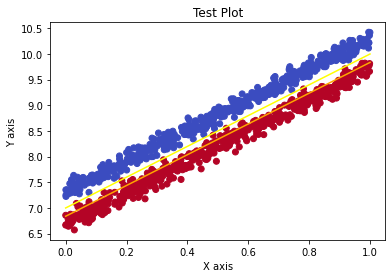

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np

%tensorflow_version 2.x
import tensorflow as tf

def get_random_data(w, b, mu, sigma, m):
  noise = np.random.default_rng().normal(mu, sigma, m)
  labels = np.random.randint(2, size=m)
  x = np.random.random(m)
  x2 = w * x + b + (-1)**labels * noise
  return labels, np.column_stack((x,x2))

labels, data = get_random_data(3,7,0.3,0.1,1000)

trainData = data[:800,:]
trainLabels = labels[:800]
testData = data[800:,:]
testLabels = labels[800:]

labels, data = get_random_data(3,7,0.3,0.1,1000)
network = tf.keras.models.Sequential()
network.add(tf.keras.layers.Dense(1, activation="sigmoid", input_shape=(2,)))
network.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
trainCat = tf.keras.utils.to_categorical(trainLabels)
testCat = tf.keras.utils.to_categorical(testLabels)
network.fit(trainData, trainLabels, epochs=1000, validation_data=(testData, testLabels))

# Display fit
weights = network.get_weights()[:1]
bias = network.get_weights()[1:][0][0]
x1_weight = weights[0][0][0] # X1 is the first value in the weights
x2_weight = weights[0][1][0] # X2 is the second value in the weights
print(x1_weight, x2_weight, bias)

# Original equation: x2 = w * x + b + (-1)**labels * noise
# Solve for w and b
w = -x1_weight/x2_weight
b = -bias/x2_weight
print(w, b)

plt.scatter(data[:,0],data[:,1], c=labels, cmap="coolwarm")

x = np.linspace(0, 1, 1000)
plt.plot(x, x*3 + 7, color='yellow', label='True Line')
plt.plot(x, x*w + b, color='orange', label='ML Line')
plt.title('Test Plot')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()

Similar techniques can be used to build models that do not depend on linear regression - for examle, convolutional neural networks contain layers made up of different convolutions and filters, which allows the network to identify shapes in images.

## Compiling a model
While running testing and training data on a model can help it learn, tweaking the testing and training data are not the only ways to improve a model's accuracy.  You can also adjust its learning rate, to help prevent a poor gradient or a loss overshoot.  You can also adjust the loss function based on the type of problem that you are solving, or modify the optimizer to change how the network tweaks the weights.  Adjusting any of these is also known as adjusting the meta-parameters of your network, and can help your model improve its accuracy on real world data.

## Training a model
Of course, one of the most important things that a model does is train.  When you run the training data on a model, it adjusts its parameters to better fit the data that it recieves.  Unfortunately, if your training data is poorly representative of the real world data, your model may underfit, and have wildly inaccurate predictions for the real-world data.  And simply training an increased number of times may cause the model to overfit to the training data; then it would be very accurate at any items that were in the training set, but not as accurate at the items that were not.  One way to help avoid this is to split your data into three parts - a training set, a testing set, and a validation set, and then use the validation set as a sanity check while training and tweaking values.

## Finetuing a pre-trained model
If you have a very limited training set, there is another option to help optimize your model and prevent over/underfitting.  You can utilize a pre-trained model, and remove their classifier, adding your own before doing moderate training.  Although small data sets have a high rate of overfitting, you can augment the pre-trained model by using data augmentation, which modifies the data with a couple of random transformations, and dropout, which allows you to ignore certian neurons when they are not needed.